# Customer segmentation challenge for Analysts

Please complete the following data processing challenge by <INSERT DATE HERE>.
Description

Use the data provided in the file customer_data_sample.csv and, through the use of visualizations and/or statistics answer the question:

**"What are the most important factors for predicting whether a customer has converted or not?"**

Converted customer is represented in the data in the field "converted", and the nature of what this conversion means is (intentionally) unknown in the context of the challenge.

Fields

| field | explanation |
|---|---|
| customer_id | Numeric id for a customer
| converted | Whether a customer converted to the product (1) or not (0)
| customer_segment | Numeric id of a customer segment the customer belongs to
| gender | Customer gender
| age | Customer age
| related_customers | Numeric - number of people who are related to the customer
| family_size | Numeric - size of family members
| initial_fee_level | Initial services fee level the customer is enrolled to
| credit_account_id | Identifier (hash) for the customer credit account. If customer has none, they are shown as "9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0"
| branch | Which branch the customer mainly is associated with |

Submission requirements

Submit your work as a git repository (preferred way):

Via git (github or bitbucket):  

Submit your answer as a version controlled (git) repository (repo) in github or bitbucket. Make sure your repo is public and submit a link to it via email.

Suggested tools / approaches

- Use summary statistics, visualization or other analytical means to explain your argumentation - it's important that you coherently explain, why you deem certain factors important and why some might be considered more important than others
- You can for example use ipython (jupyter) notebooks, BI visualization tools (Tableau, Power BI, Excel) or such
- Remember to include your full answer and used visualizations (code and pdfs) in your submission

Reach out to adithya@lenus.io if you have any questions regarding the case brief or dataset.


# Solution

The solution is separated into 3 different sections with a personal script.:

* Study of the content on the dataset `Cleaning_data.py`
    
* Visalization of the data `visualization.py`

* Processing the data `processing.py`

During this notebook, every section will contain the python command to run the scripts and afterwards the code in the jupyter cell, one must choose which one prefer to run. The code inside each script is commented and should be self explanatory. To make the debugging as simple as possible before presenting the solution, one must chekc the list of required packages:
    
* [numpy](https://numpy.org/)

* [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)
    
* [matplotlib](https://matplotlib.org/)

* [scikit-learn](https://scikit-learn.org/stable/index.html)

* [xgboost](https://xgboost.ai/)



## Cleaning the data

This process is a basic preprocessing of the data, open the excel dataset and investigate the system, which will give us an overview of the different parameters and features. It can be easily done by running the `Cleaning_data.py` file.

One of the most important decisions in this part is what to do with nan values and if we should normalize the data. In this case I took all of the nan values, as there were only 2 in the `branch` section and 175 in the feature `age`. This left as with 712 for the classification, which seem good enough. One could have decided to give age a random value as 0 or 100, or the total mean, but due to the fact that this could generate a bias in our model I preferred to erase them. It is also important to notice that this was strictly necessary as some classifiers can work while using nan values. In the case of the normalization, for this calssication it is neglectable, the result is the same, so it os faster to simply avoid that step, for other methods, specially unsupervised methods, it could be important.

It is important to notice that since we do not know what does `converted` means, we do not have that much prior information, we can expeculate, but that could generate a bias in the model. However, we can accept that the variable is related to a positive interaction of the customer with the app, which means a positive behaviour in the training. Hence, one could believe that variables such as `gender`, `family_size` or `customer_segment` will have higher impact than `branch`, `initial_fee_level` or `credit_account_id`.


In [1]:
from Cleaning_data import cleaning_data
from os.path       import join

path_to_dataset = "./"
dataset_name = join(path_to_dataset, "Data_Scientist_-_Case_Dataset.xlsx")
output_name  = join(path_to_dataset, "Cleaned_datashet_Carlos.csv")

data = cleaning_data(dataset_name,
                    save_csv = True,
                    print_info = True,
                    output_name = output_name)

   customer_id  converted  customer_segment  gender   age  related_customers  \
0        15001          0                13    male  22.0                  1   
1        15002          1                11  female  38.0                  1   
2        15003          1                13  female  26.0                  0   
3        15004          1                11  female  35.0                  1   
4        15005          0                13    male  35.0                  0   

   family_size  initial_fee_level  \
0            0            14.5000   
1            0           142.5666   
2            0            15.8500   
3            0           106.2000   
4            0            16.1000   

                                   credit_account_id    branch  
0  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...  Helsinki  
1  afa2dc179e46e8456ffff9016f91396e9c6adf1fe20d17...   Tampere  
2  9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...  Helsinki  
3  abefcf257b5d2ff2816a68ec7c84ec8c1

# Visualizing the data

An important thing to do before making any calculations is look into the data and see if there is any clear relation. Most of the times, this is not possible as the number of features might excess the limits of what is reasonable or there is no clear sign that any features will give any interesting solution. In this case, we have 8 features that we can compare with the classification target `converted`. For that reason, we made some scatters. Notice that we are going to separate this scatters in the 3 cathegories of `customer_segment` as this feature seem to separate different types of costumers, which might have different needs and different factors might trigger them to convert. This could also be done with `gender`, `branch` or `age`, for example.

Scatters might not be really visual unless the correlation is obvious. For that reason, we might also want to see the percentage of customers that has been converted for a certain feature. This means, separate the customer into male and female and see the percentage difference, or for the different segments. This is more reasonable to do for discrete feature, as `gender` or `branch`, than continuous, or semi-consitnuous, as `age` or `initial_fee_level`. Hence, I looked at this separations for `gender` and `segment` to get an idea.

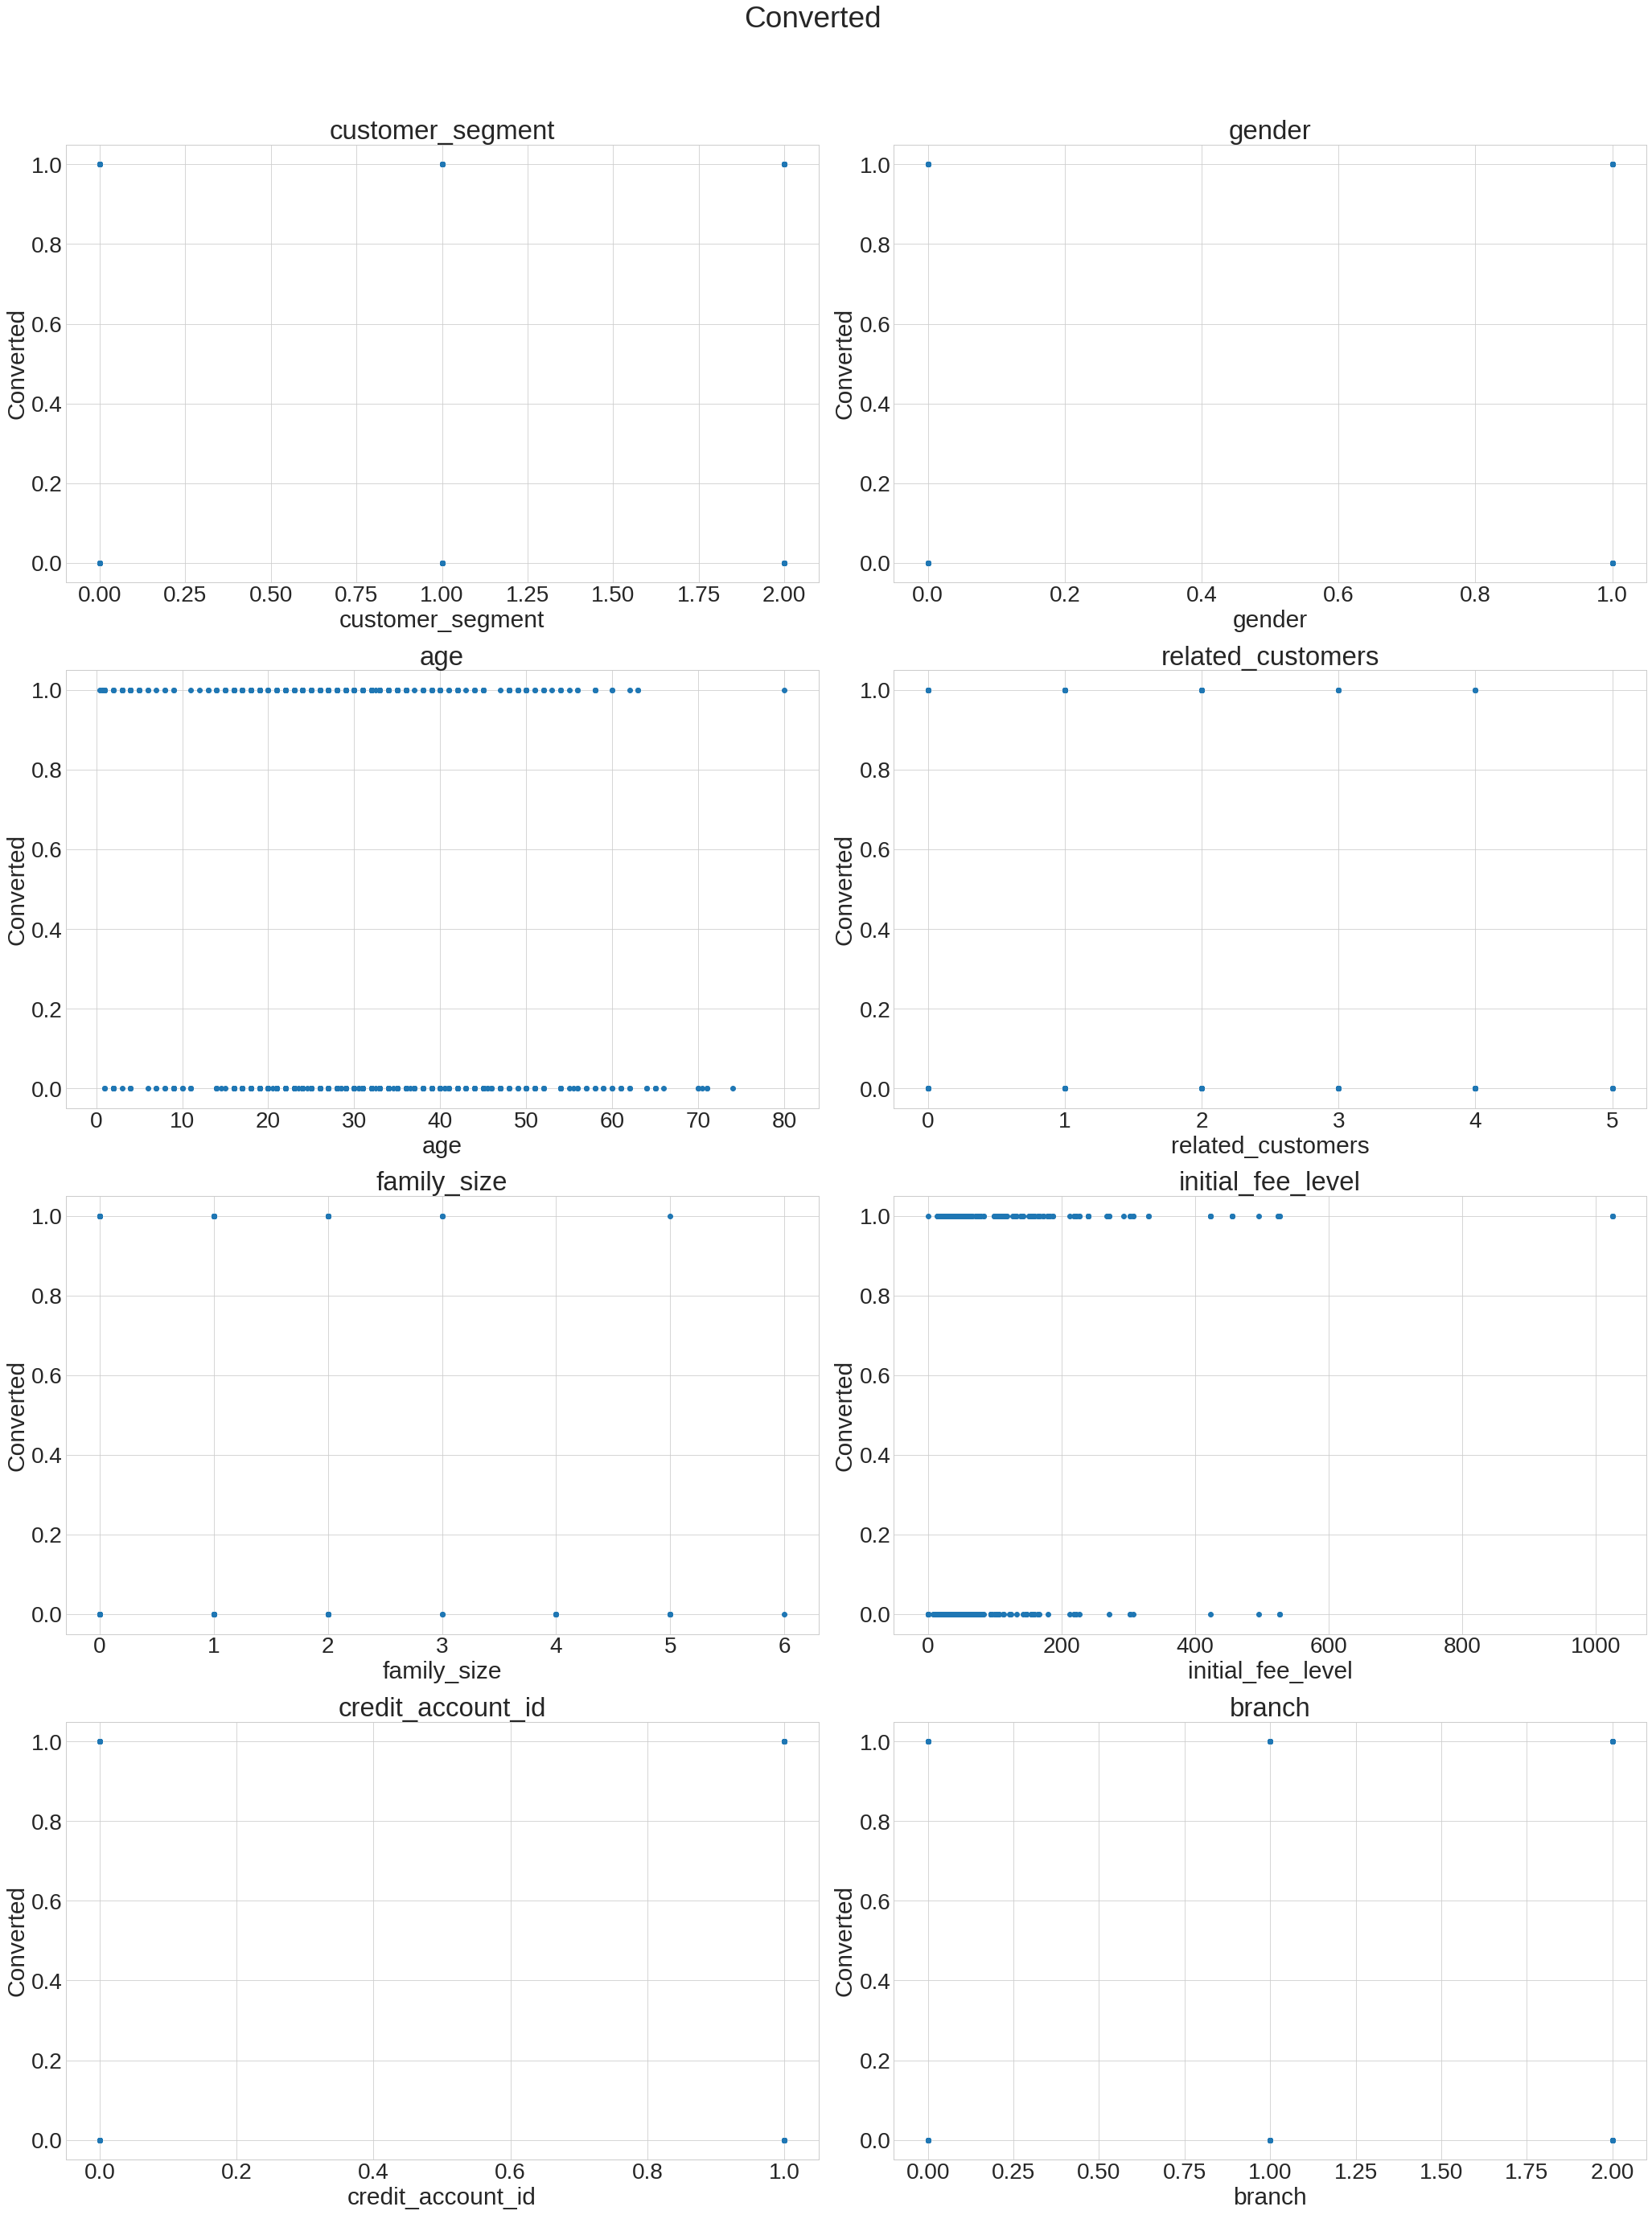

63.624 % of the female users has converted
75.290 % of the male users has converted
65.217 % of the segment 11 users has converted
47.977 % of the segment 12 users has converted
23.944 % of the segment 13 users has converted
36.282 % of the branch Helsinki users has converted
60.769 % of the branch Tampere has converted
28.571 % of the branch Turku has converted


In [2]:
from visualizing       import visualize
from Cleaning_data     import cleaning_data
from os.path           import join
from matplotlib.pyplot import show

path_to_dataset = "./"
dataset_name = join(path_to_dataset, "Data_Scientist_-_Case_Dataset.xlsx")

data = cleaning_data(dataset_name,
                    save_csv = False,
                    print_info = False)

# segments = data["customer_segment"].unique()
# for segment in segments:
# data_sgmt = data.where(data['customer_segment'] != segment).dropna()
data_sgmt = data.copy()
convert = data_sgmt.pop('converted')
    # print(f"This data field has {data_sgmt.shape[1]} different parameters with {data_sgmt.shape[0]} entries")
fig, ax = visualize(data_sgmt, convert, save_fig = f"Scatter.pdf")
show()

## A part from visualizing we can show some percentage:

female = data.loc[data['gender']]
female_convert = female.converted.sum() / female.shape[0]
male = data.loc[data['gender'] != 1]
male_convert = male.converted.sum() / male.shape[0]
print(f"{female_convert * 100:1.3f} % of the female users has converted")
print(f"{male_convert * 100:1.3f} % of the male users has converted")

cstm_sgmt_11 = data.loc[data['customer_segment'] == 0]
cstm_sgmt_11_convert = cstm_sgmt_11.converted.sum() / cstm_sgmt_11.shape[0]
cstm_sgmt_12 = data.loc[data['customer_segment'] == 1]
cstm_sgmt_12_convert = cstm_sgmt_12.converted.sum() / cstm_sgmt_12.shape[0]
cstm_sgmt_13 = data.loc[data['customer_segment'] == 2]
cstm_sgmt_13_convert = cstm_sgmt_13.converted.sum() / cstm_sgmt_13.shape[0]
print(f"{cstm_sgmt_11_convert * 100:1.3f} % of the segment 11 users has converted")
print(f"{cstm_sgmt_12_convert * 100:1.3f} % of the segment 12 users has converted")
print(f"{cstm_sgmt_13_convert * 100:1.3f} % of the segment 13 users has converted")

branch_1 = data.loc[data['branch'] == 0]
branch_1_convert = branch_1.converted.sum() / branch_1.shape[0]
branch_2 = data.loc[data['branch'] == 1]
branch_2_convert = branch_2.converted.sum() / branch_2.shape[0]
branch_3 = data.loc[data['branch'] == 2]
branch_3_convert = branch_3.converted.sum() / branch_3.shape[0]
print(f"{branch_1_convert * 100:1.3f} % of the branch Helsinki users has converted")
print(f"{branch_2_convert * 100:1.3f} % of the branch Tampere has converted")
print(f"{branch_3_convert * 100:1.3f} % of the branch Turku has converted")

From this visualizations, there is no visible correlation between a feature and the classification we want to make, reason why the plots look so poor and we shall not look further into them. But we can see that males tend to convert 10 % more than females and that if you are in segment 11 the probabilities of converting are 40 % more than at segment 13. Something really similar happens to the Tampere branch, where the probability of conversion is nearly 30 % higher than in the other 2 branches. This demonstrates the importance of these features.

## Processing the data

After inspecting our data, it is the moment to actually look further into it, look for the different correlation between features that might trigget a conversion. For that, instead of keep looking at the data by itself, we will train 2 models, `AdaBoost` and `XGBoost`; and see how erasing features might reduce the accuracy of this methods, this can be easily done with the funciton `permutation_importance` from `scikit-learn`.

[17:31:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of the AdaBoostClassifier is 0.803
The accuracy of the XGBClassifier is 0.820
gender  0.180 +/- 0.028
age     0.086 +/- 0.022
customer_segment0.032 +/- 0.010
initial_fee_level0.025 +/- 0.010
gender  0.206 +/- 0.026
customer_segment0.075 +/- 0.017
age     0.062 +/- 0.020


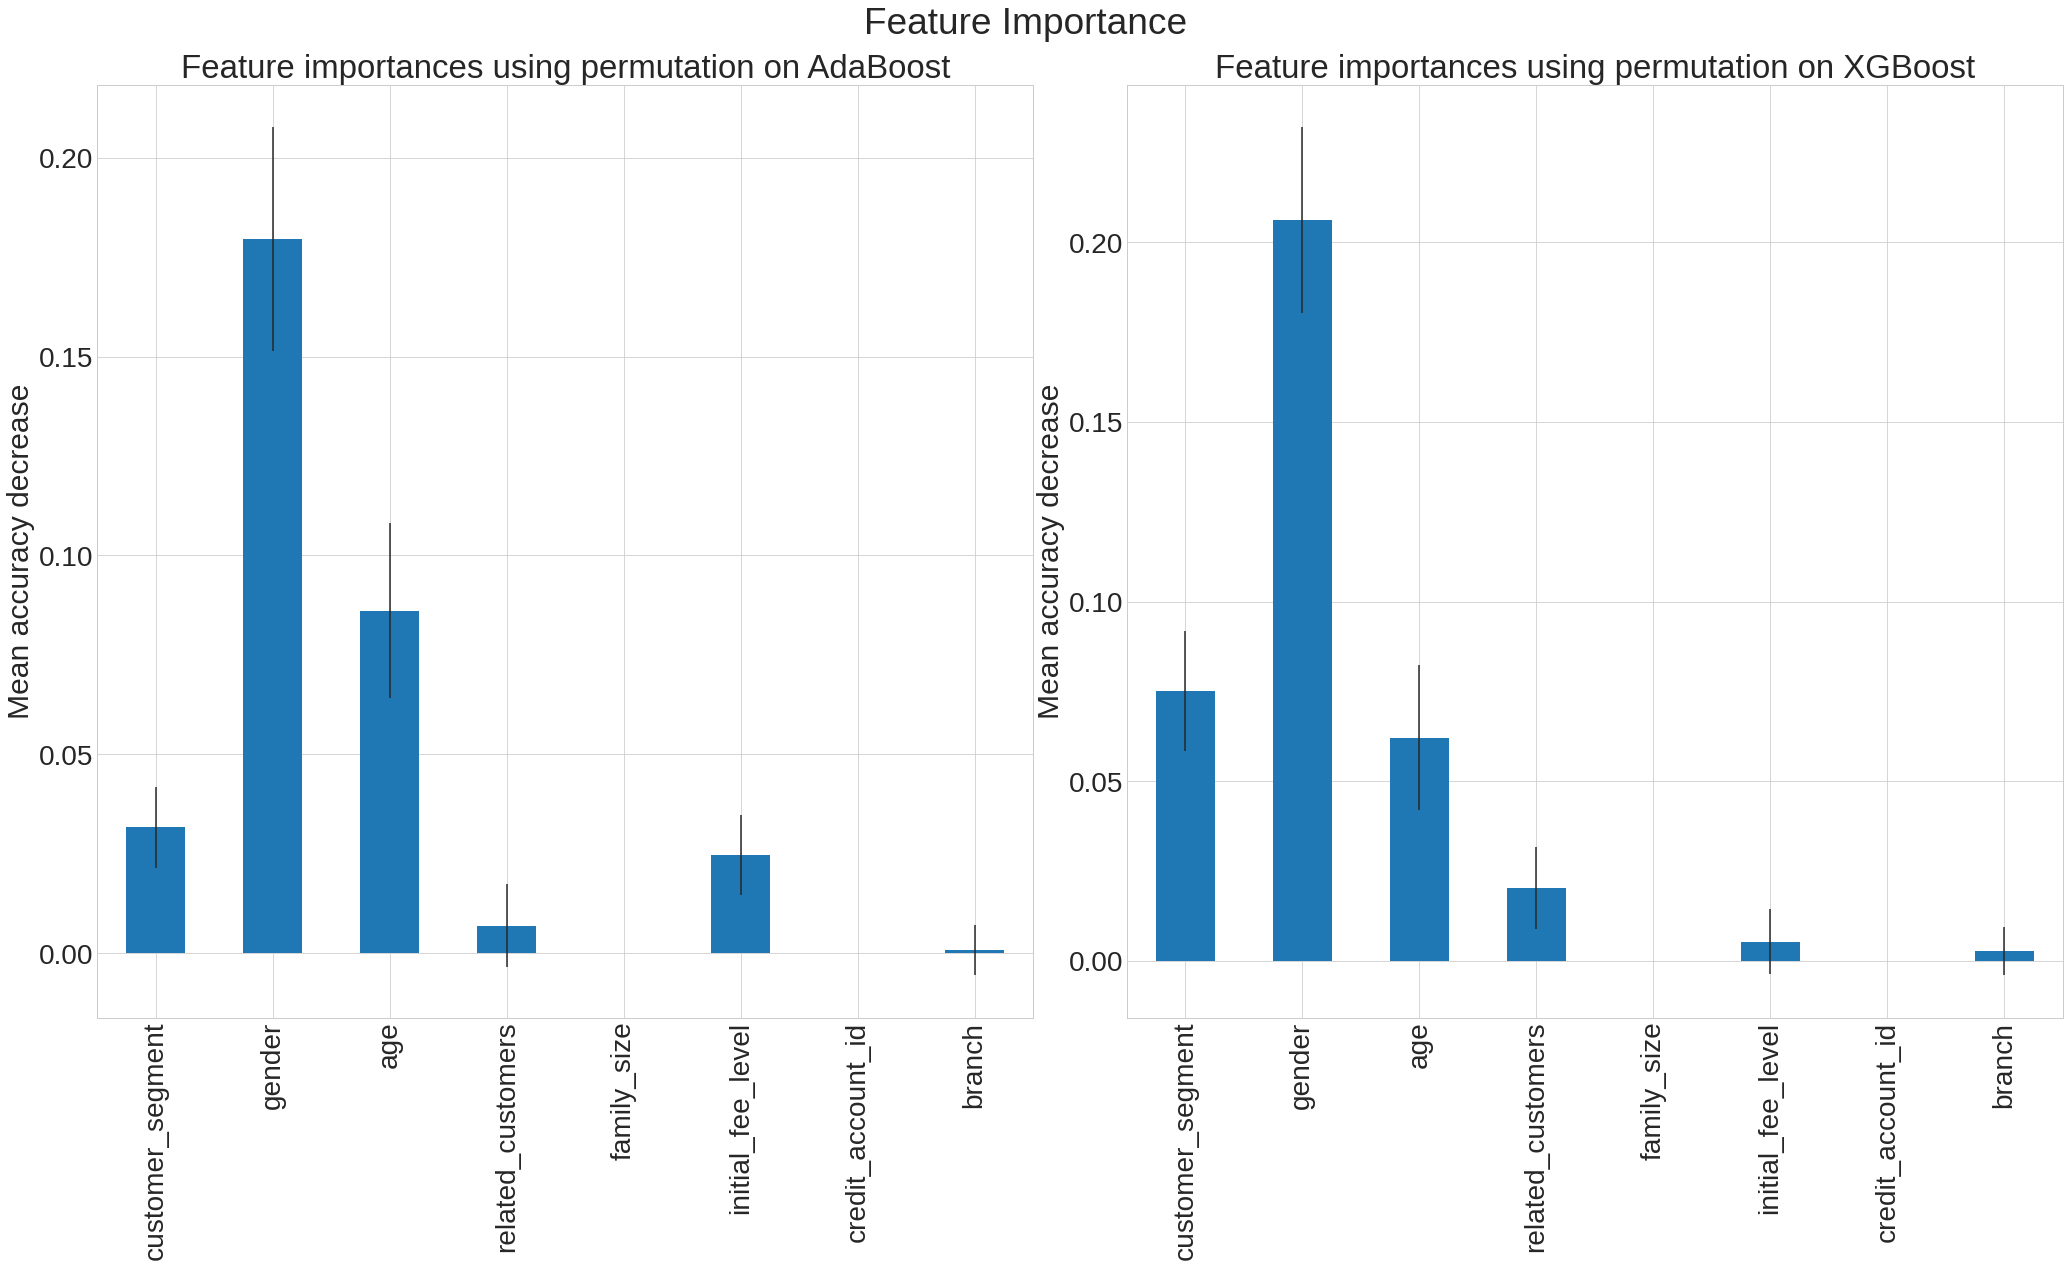

In [3]:
from Cleaning_data           import cleaning_data
from visualizing             import plot_importance
from processing              import modelling
from os.path                 import join, isfile
from matplotlib.pyplot       import show, subplots, style

## Get the data an clean it
path_to_dataset = "./"
dataset_name = join(path_to_dataset, "Data_Scientist_-_Case_Dataset.xlsx")

data = cleaning_data(dataset_name,
                    save_csv = False,
                    print_info = False)
## Separate in x and y
convert = data.pop("converted")
models, rs = modelling(data, convert)

model_names = ["AdaBoost", "XGBoost"]
fig, axs = subplots(1, 2, figsize = (30, 18))

fig.suptitle("Feature Importance", fontsize = 37)


for ax, model_name, r  in zip(axs, model_names, rs):
    ax = plot_importance(ax, r, model_name, index = data.keys())

fig.subplots_adjust(bottom=0.2,
                top = 0.92,
                left=0.07,
                right=0.98,
                hspace = 0.5,
                wspace = 0.1
                )
# fig.tight_layout()

fig.savefig("Figures/Feature_importance.jpeg")
show()

## Conclusions

To conclude we can accept that the 3 more important features for this classification task are `gender`, `age` and `customer_segment`, highlighting `gender`. However, the parameters `related\_costumers`, `initial_fee_level` and `branch` are still important and the last two parameters `family_size` and `credit_account_id` are completely irrelevant.

From the parameters that are not so important, it is interesting to highlight two, `branch` and `family_size`. Both of them seem to be neglectable, still there are arguments for them to be relevant. `family_size` might affect the amount of free time a customer has and hence the engage to their training and the app. Same happens to `branch`, a parameter that seemed to be really important by itself, people convert much more in Tampere that in any other branch, but yet `branch` is not a decisive parameter. In the case of `branch`, when we looked at the branches, Tampere has 30 % more probabilities of converting than in any other branch. The reason for this is more obvious than for `family_size`, the branches are really bias Helsinki covers 80 % of the users, hence the influence of this parameter is limited. Furthermore, the cultural aspect of the location of the different branches might seem really important, but all the branches belong to the same country, Finland. Hence, either it is just a coincidence that people in Tampere convert more or we need more data from Tampere to get a reliable correlation. For `family_size` in general will only be significant in case it refers to number of children, as they are the ones that need more attention. However, as children grow their needs decreases and as far as you schedule yourself along with your children, you can always find time to do sport, or even do sport with your family, erasing the significance of this parameter. This lack of relevance of `family_size` might be also related to the fact that our hypothesis of what is the `converted` parameter might be wrong

Finally, it is interesting to keep in mind that `gender` is by far the most relevant parameter. If we accept that `converted` is not a gender related variable, this result demonstrates that gender roles are still a key part of our societies and that gender keeps clustering individuals in different segments. Continuing with the hypothesis that our classification parameter is related to a positive engage with the app, this information may be useful in the way on how trigger costumers with gender specific advertisement. However this is just speculation and we already knew that men convert 10 % more than men.

![](Figure/Feature_importance.jpeg)

